In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm 
from malnis import show
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(style = "whitegrid")

In [2]:
folder = "/home/jarobyte/scratch/malnis_dataset/lstm/train_logs/"
files = sorted(os.listdir(folder))
files

['13773803_1.pkl',
 '13773803_10.pkl',
 '13773803_11.pkl',
 '13773803_12.pkl',
 '13773803_2.pkl',
 '13773803_3.pkl',
 '13773803_4.pkl',
 '13773803_6.pkl',
 '13773803_7.pkl',
 '13773803_8.pkl',
 '13773803_9.pkl',
 '13780573_1.pkl',
 '13780573_10.pkl',
 '13780573_11.pkl',
 '13780573_12.pkl',
 '13780573_3.pkl',
 '13780573_4.pkl',
 '13780573_5.pkl',
 '13780573_6.pkl',
 '13780573_7.pkl',
 '13780573_8.pkl',
 '13784054_1.pkl',
 '13784054_10.pkl',
 '13784054_11.pkl',
 '13784054_12.pkl',
 '13784054_2.pkl',
 '13784054_3.pkl',
 '13784054_4.pkl',
 '13784054_5.pkl',
 '13784054_6.pkl',
 '13784054_7.pkl',
 '13784054_8.pkl',
 '13784054_9.pkl',
 '13790732_1.pkl',
 '13790732_10.pkl',
 '13790732_11.pkl',
 '13790732_12.pkl',
 '13790732_2.pkl',
 '13790732_3.pkl',
 '13790732_4.pkl',
 '13790732_5.pkl',
 '13790732_6.pkl',
 '13790732_7.pkl',
 '13790732_8.pkl',
 '13790732_9.pkl']

In [3]:
data = pd.concat([pd.read_pickle(folder + x).assign(name = x) for x in tqdm(files)])
show(data)

  0%|          | 0/45 [00:00<?, ?it/s]

(69000, 10)


,epoch,total_epochs,train_loss,hidden_size,num_layers,weight_decay,average_precision,roc_auc,training_minutes,name
0,1,1000,0.147730,200,1,0.0,0.108948,0.723997,23.658573,13773803_1.pkl
1,2,1000,0.087960,200,1,0.0,0.108948,0.723997,23.658573,13773803_1.pkl
2,3,1000,0.086138,200,1,0.0,0.108948,0.723997,23.658573,13773803_1.pkl
3,4,1000,0.085129,200,1,0.0,0.108948,0.723997,23.658573,13773803_1.pkl
4,5,1000,0.084667,200,1,0.0,0.108948,0.723997,23.658573,13773803_1.pkl


In [4]:
data.total_epochs.max()

2000

In [5]:
data.training_minutes.max()

307.79724104896667

In [6]:
data.groupby("name").train_loss.min().sort_values().head()

name
13784054_4.pkl    0.000170
13784054_2.pkl    0.000184
13784054_9.pkl    0.000185
13784054_7.pkl    0.000221
13784054_8.pkl    0.000250
Name: train_loss, dtype: float64

In [7]:
data.groupby("name").roc_auc.mean().sort_values(ascending = False).head()

name
13773803_1.pkl    0.723997
13780573_6.pkl    0.723120
13773803_9.pkl    0.722363
13790732_1.pkl    0.722159
13790732_8.pkl    0.719738
Name: roc_auc, dtype: float64

In [8]:
data.groupby("name").average_precision.mean().sort_values(ascending = False).head()

name
13784054_9.pkl    0.127544
13784054_4.pkl    0.126155
13784054_2.pkl    0.126046
13780573_6.pkl    0.123051
13784054_5.pkl    0.121957
Name: average_precision, dtype: float64

# the effect of weight decay

In [9]:
data.groupby("weight_decay").train_loss.min()

weight_decay
0.00000    0.000170
0.00001    0.074243
0.00010    0.081842
0.00100    0.089088
Name: train_loss, dtype: float64

In [10]:
data.groupby("weight_decay").roc_auc.max()

weight_decay
0.00000    0.723997
0.00001    0.722159
0.00010    0.684606
0.00100    0.589650
Name: roc_auc, dtype: float64

In [11]:
data.groupby("weight_decay").average_precision.max()

weight_decay
0.00000    0.127544
0.00001    0.091821
0.00010    0.069066
0.00100    0.046194
Name: average_precision, dtype: float64

# queries

In [12]:
best = data.query("name == '13784054_9.pkl'")
show(best)

(2000, 10)


,epoch,total_epochs,train_loss,hidden_size,num_layers,weight_decay,average_precision,roc_auc,training_minutes,name
0,1,2000,0.102261,500,4,0.0,0.127544,0.683464,307.797241,13784054_9.pkl
1,2,2000,0.088551,500,4,0.0,0.127544,0.683464,307.797241,13784054_9.pkl
2,3,2000,0.083632,500,4,0.0,0.127544,0.683464,307.797241,13784054_9.pkl
3,4,2000,0.082744,500,4,0.0,0.127544,0.683464,307.797241,13784054_9.pkl
4,5,2000,0.082378,500,4,0.0,0.127544,0.683464,307.797241,13784054_9.pkl


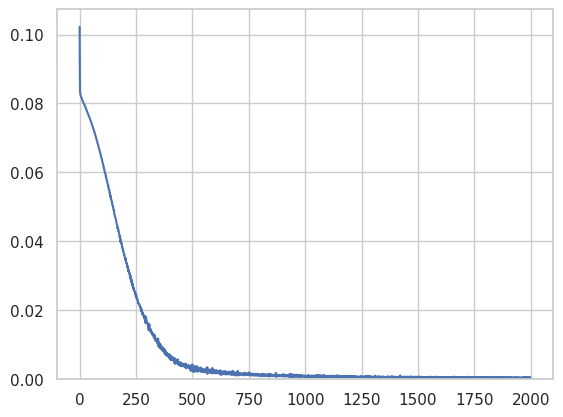

In [13]:
plt.plot(best.train_loss)
plt.ylim(0)
plt.show()

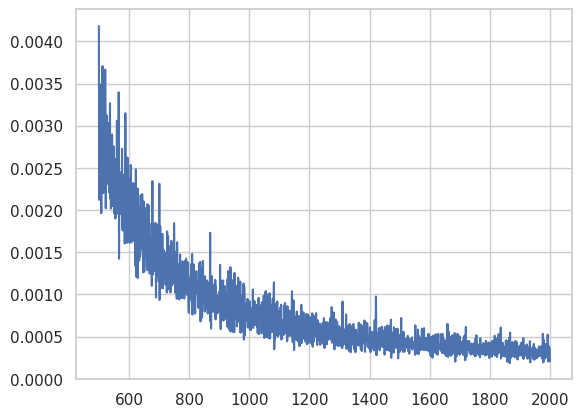

In [14]:
plt.plot(best.train_loss.iloc[500:])
plt.ylim(0)
plt.show()

# metrics

In [15]:
data.groupby(["hidden_size", "num_layers"])\
.train_loss\
.min().unstack()\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,0.006153,0.033953,0.025577,0.003625
150,nan,0.000843,0.090443,nan
200,0.021513,0.004407,nan,nan
250,0.000627,0.001789,0.001337,0.001473
300,0.000540,0.082138,0.000695,0.000250
350,nan,0.076909,0.000254,0.081842
400,nan,0.001092,0.090445,nan
450,0.089116,0.000221,0.081945,nan
500,0.004100,0.000692,0.000443,0.000170


In [16]:
data.groupby(["hidden_size", "num_layers"])\
.roc_auc\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,0.703700,0.708700,0.700800,0.670700
150,nan,0.696300,0.585600,nan
200,0.724000,0.707200,nan,nan
250,0.722400,0.712200,0.709900,0.680100
300,0.716600,0.672900,0.705800,0.674600
350,nan,0.719700,0.722200,0.684600
400,nan,0.707400,0.585700,nan
450,0.589500,0.704700,0.671700,nan
500,0.723100,0.703600,0.702200,0.683500


In [17]:
data.groupby(["hidden_size", "num_layers"])\
.average_precision\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,0.094800,0.085700,0.089100,0.088700
150,nan,0.088400,0.045100,nan
200,0.108900,0.094000,nan,nan
250,0.116700,0.100800,0.108300,0.106300
300,0.122000,0.067200,0.109100,0.115600
350,nan,0.088700,0.114700,0.069100
400,nan,0.116100,0.045200,nan
450,0.046200,0.117700,0.064700,nan
500,0.123100,0.117800,0.115500,0.127500


In [18]:
data.groupby(["hidden_size", "num_layers"])\
.training_minutes\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,47.213200,37.133300,56.304500,123.891800
150,nan,74.615100,107.068900,nan
200,23.658600,82.273100,nan,nan
250,59.776900,49.487800,70.356400,98.002200
300,51.561000,95.393700,67.238500,186.816100
350,nan,139.936200,205.592700,270.420500
400,nan,57.376700,171.888600,nan
450,93.606700,184.530100,264.320300,nan
500,80.174700,75.021600,110.805600,307.797200
